In [2]:
import numpy as np
import pandas as pd 
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from google.colab import drive

In [3]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## Reading the Dataset

In [4]:
fake = pd.read_csv('/content/drive/MyDrive/3 - DLCVNLP Projects/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/3 - DLCVNLP Projects/True.csv')
fake['flag'] = 0
true['flag'] = 1

In [5]:
fake.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
true.head()

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
flag       0
dtype: int64

In [10]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
flag       0
dtype: int64

## Merging True and Fake dataset

In [11]:
df = pd.DataFrame()
df = true.append(fake)

## Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   flag     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
df.columns

Index(['title', 'text', 'subject', 'date', 'flag'], dtype='object')

In [14]:
df.shape

(44898, 5)

## Removing the duplicates and preventing problems with indexing

In [15]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [16]:
df.shape

(44689, 5)

In [17]:
df.date.unique()

array(['December 31, 2017 ', 'December 29, 2017 ', 'December 30, 2017 ',
       ..., 'December 18, 2017', 'December 14, 2017', 'December 8, 2017'],
      dtype=object)

## Correcting the Date column

In [18]:
# Correcting some data
df['date'] = df['date'].replace(['19-Feb-18'],'February 19, 2018')
df['date'] = df['date'].replace(['18-Feb-18'],'February 18, 2018')
df['date'] = df['date'].replace(['17-Feb-18'],'February 17, 2018')
df['date'] = df['date'].replace(['16-Feb-18'],'February 16, 2018')
df['date'] = df['date'].replace(['15-Feb-18'],'February 15, 2018')
df['date'] = df['date'].replace(['14-Feb-18'],'February 14, 2018')
df['date'] = df['date'].replace(['13-Feb-18'],'February 13, 2018')


df['date'] = df['date'].str.replace('Dec ', 'December ')
df['date'] = df['date'].str.replace('Nov ', 'November ')
df['date'] = df['date'].str.replace('Oct ', 'October ')
df['date'] = df['date'].str.replace('Sep ', 'September ')
df['date'] = df['date'].str.replace('Aug ', 'August ')
df['date'] = df['date'].str.replace('Jul ', 'July ')
df['date'] = df['date'].str.replace('Jun ', 'June ')
df['date'] = df['date'].str.replace('Apr ', 'April ')
df['date'] = df['date'].str.replace('Mar ', 'March ')
df['date'] = df['date'].str.replace('Feb ', 'February ')
df['date'] = df['date'].str.replace('Jan ', 'January ')

df['date'] = df['date'].str.replace(' ', '')

for i, val in enumerate(df['date']):
    df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce')
    
df['date'] = df['date'].astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
df.head(10)

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,2017-12-29,1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,2017-12-29,1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,2017-12-29,1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,2017-12-29,1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,2017-12-28,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   flag     44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


## Dividing the date in Month and Year

In [21]:
import datetime as dt
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

df['month'] = df['month'].astype(str)

In [22]:
df.head()

,title,text,subject,date,flag,year,month
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,2017,2017-12
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,2017,2017-12
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,2017,2017-12
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1,2017,2017-12
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1,2017,2017-12


## Fake news stats

In [23]:
dff = df[['month', 'flag']]
dff = dff.dropna()
dff = dff.groupby(['month'])['flag'].sum()

In [24]:
dff = dff.drop('NaT')

In [25]:
dff.tail()

month
2017-09    3062
2017-10    3157
2017-11    3081
2017-12    2416
2018-02       0
Name: flag, dtype: int64

In [26]:
import plotly.express as px
fig = px.histogram(x= dff.index ,y=dff.values)
fig.show()

## Fake news Center

In [27]:
dfff = df[['subject', 'flag']]
dfff = dfff.dropna()
dfff = dfff.groupby(['subject'])['flag'].sum()

In [28]:
dfff

subject
Government News        0
Middle-east            0
News                   0
US_News                0
left-news              0
politics               0
politicsNews       11220
worldnews           9991
Name: flag, dtype: int64

In [29]:
fig = px.histogram(y= dfff.index ,x=dfff.values)
fig.show()

## Text Processing

In [30]:
nlp = df

## TF - IDF Vectorizer

In [31]:
corpus = nlp[nlp['flag'] == 1]['title'].iloc[0:500] 
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

df_words.head()

,10,11,12,14,15,18,19,20,2016,2017,2018,2020,21,22,25,26,27,28,29,30,45,50,65,81,95,abc,abortion,about,abuse,accept,access,accident,accomplishes,account,accounts,accusations,accused,accusers,accusing,across,...,weighed,weighs,well,wells,were,what,whether,white,who,whose,wide,widens,wildfires,will,win,winner,winners,wins,with,withdraws,within,women,won,words,work,worker,workers,worldwide,worried,worry,would,wrapped,wray,write,writer,wrong,year,years,york,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_words.shape

(500, 1541)

In [34]:
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="black", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

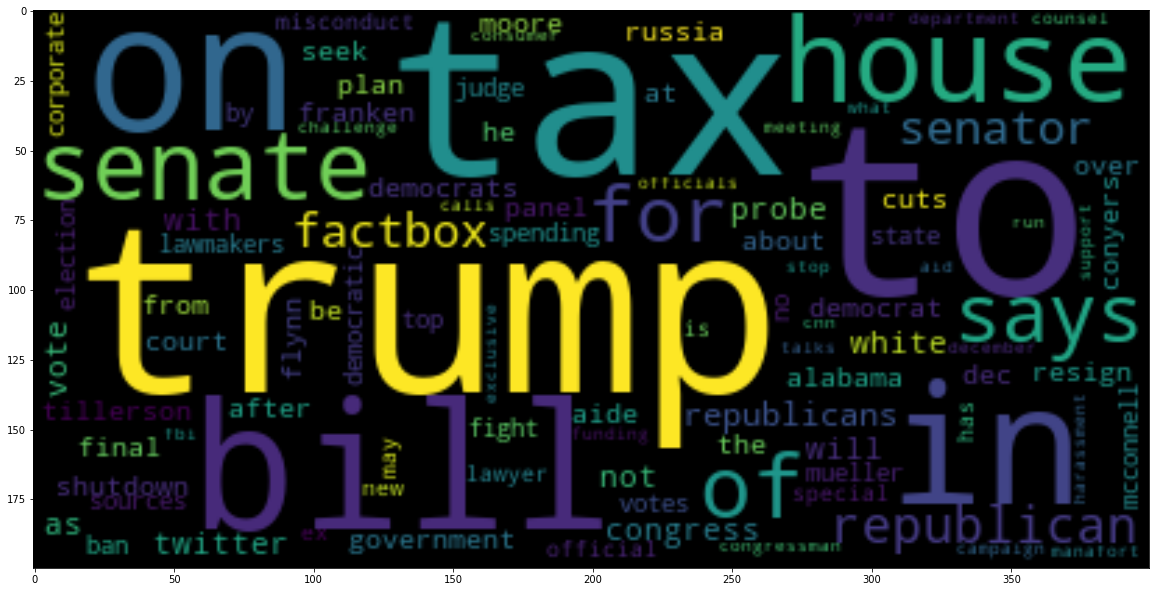

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(Cloud, interpolation='bilinear')

In [36]:
nlp.head(10)

,title,text,subject,date,flag,year,month
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,2017,2017-12
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,2017,2017-12
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,2017,2017-12
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1,2017,2017-12
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1,2017,2017-12
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,2017-12-29,1,2017,2017-12
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,2017-12-29,1,2017,2017-12
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,2017-12-29,1,2017,2017-12
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,2017-12-29,1,2017,2017-12
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,2017-12-28,1,2017,2017-12


In [37]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nlp['title'] = nlp['title'].apply(lambda x: word_tokenize(str(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Stemming

In [38]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
nlp['title'] = nlp['title'].apply(lambda x: [snowball.stem(y) for y in x])

nlp['title'] = nlp['title'].apply(lambda x: ' '.join(x))

nlp.head()

,title,text,subject,date,flag,year,month
0,"as u.s. budget fight loom , republican flip th...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,2017,2017-12
1,u.s. militari to accept transgend recruit on m...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,2017,2017-12
2,senior u.s. republican senat : let mr. mueller...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,2017,2017-12
3,fbi russia probe help by australian diplomat t...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1,2017,2017-12
4,trump want postal servic to charg much more ' ...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1,2017,2017-12


In [39]:
from nltk.corpus import stopwords 

nltk.download('words')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## TF - IDF Vector

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(nlp['title'])

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, nlp['flag'], test_size=0.33, random_state=1)

## Multinomial Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Prediction on Test Set

In [45]:
y_pred = MNB.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [46]:
y_test1=y_test.values

## Predicted vs Actual Value

In [47]:
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test1.reshape(len(y_test1),1)),1)
print(data)

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [0 0]]


## 5-fold Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(MNB, X_text, nlp['flag'], cv=5)
print('5 Fold Cross Validation : ',a)

5 Fold Cross Validation :  [0.91508167 0.89773999 0.89225778 0.95121951 0.93129686]


## Accuracy

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
aa = accuracy_score(y_pred, y_test)
print('Accuracy : ',aa)

Accuracy :  0.939924057499322


## Confusion Matrix

In [51]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[7387  586]
 [ 300 6475]]


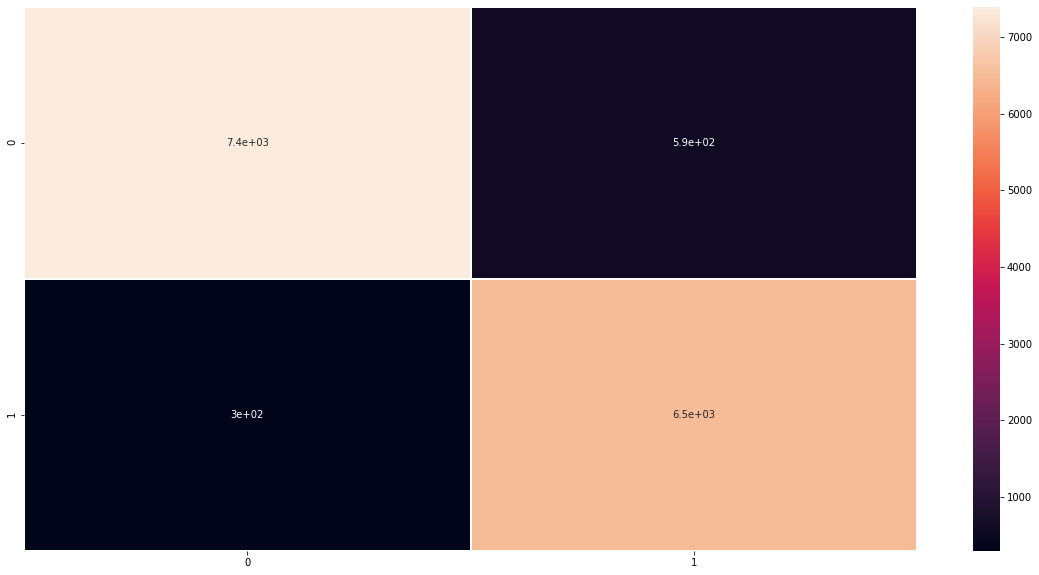

In [57]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot = True, linewidth=1)

## Classification Report

In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7973
           1       0.92      0.96      0.94      6775

    accuracy                           0.94     14748
   macro avg       0.94      0.94      0.94     14748
weighted avg       0.94      0.94      0.94     14748



**This Model can Predict Fake News with an Accuracy of 94%**